## (a) $V_\text{in}(t) = \pm1 \text{if} \left \lfloor{2t}\right \rfloor \text{is even/odd}$

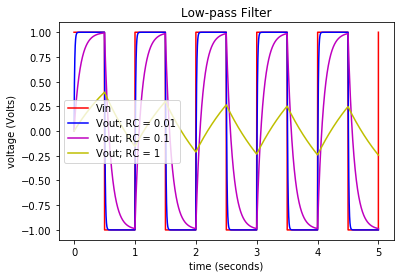

In [5]:
%matplotlib inline
from math import floor
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, title, legend
t0 = 0                         # initial time
tf = 5                        # final time
N = 10000                     # number time values
dt = (tf - t0)/N               # time step
tvals  = linspace(t0, tf, N)   # array of time values
v1 = 0      
v2 = 0
v3 = 0                
v1out = []
v2out = []
v3out = []

def Vin(t):
    if floor(2*t) % 2 == 0:
        return 1
    else:
        return -1
        
def Vinprime(t):
    return (Vin(t + dt) - Vin(t)) / dt

def Voutprime(t, rc, vout):
    return (Vin(t) - vout)/rc

for t in tvals:
    v1out.append(v1)
    v2out.append(v2)
    v3out.append(v3)
    v1 += dt*Voutprime(t, 0.01, v1) ##blue plot
    v2 += dt*Voutprime(t, 0.1, v2)  ##magenta plot
    v3 += dt*Voutprime(t, 1, v3)    ##yellow plot

# plot results
plot(tvals, [Vin(t) for t in tvals], "r-", label="Vin")
plot(tvals, v1out, "b-", label="Vout; RC = 0.01") 
plot(tvals, v2out, "m-", label="Vout; RC = 0.1") 
plot(tvals, v3out, "y-", label="Vout; RC = 1") 
xlabel("time (seconds)")
ylabel("voltage (Volts)")
title("Low-pass Filter")
legend()
show()

## (b) $V_\text{in}(t) = \sin(t) + \sin(10t) + \sin(100t)$

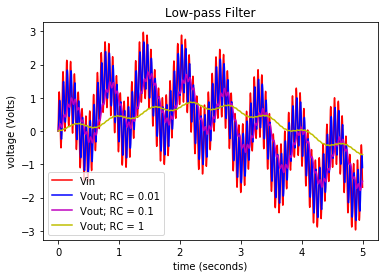

In [6]:
%matplotlib inline
from math import floor, sin
from numpy import linspace
from pylab import plot, show, xlabel, ylabel, title, legend
t0 = 0                         # initial time
tf = 5                        # final time
N = 10000                     # number time values
dt = (tf - t0)/N               # time step
tvals  = linspace(t0, tf, N)   # array of time values
v1 = 0      
v2 = 0
v3 = 0                
v1out = []
v2out = []
v3out = []

def Vin(t):
    return sin(t) + sin(10*t) + sin(100*t)

def Voutprime(t, rc, vout):
    return (Vin(t) - vout)/rc


for t in tvals:
    v1out.append(v1)
    v2out.append(v2)
    v3out.append(v3)
    v1 += dt*Voutprime(t, 0.01, v1) ##blue plot
    v2 += dt*Voutprime(t, 0.1, v2)  ##magenta plot
    v3 += dt*Voutprime(t, 1, v3)    ##yellow plot

# plot results
plot(tvals, [Vin(t) for t in tvals], "r-", label="Vin")
plot(tvals, v1out, "b-", label="Vout; RC = 0.01") 
plot(tvals, v2out, "m-", label="Vout; RC = 0.1") 
plot(tvals, v3out, "y-", label="Vout; RC = 1") 
legend()
xlabel("time (seconds)")
ylabel("voltage (Volts)")
title("Low-pass Filter")
show()

## (c) Explaination of low-pass filter



Like the name implies, a low pass filter lets lower frequencies pass through. That is if we look into the frequency domain, f(t) = sin(t) + sin(10*t) + sin(100*t) has frequencies 1, 10, and 100 and so when rc = 1, its kind of like sampling sin(t), when rc = 0.1 its like sampling sin(t) + sin(10*t) etc.